# Data Augmentation
Data/Image Augmentation is a relatively new and important image processing task. Data augmentation is a technique to artificially create new training data from existing training data. This is done by applying domain-specific techniques to examples from the training data that create new and different training examples. The intent is to expand the training dataset with new, plausible examples.This is achieved by various modifications to our original training images.Data Augmentation is very useful in making a model and generalize the model.

### Some of the most common data augmentation techniques used for images are:
- Flipping (Horizonal as well as Vertical)
- Translations
- Blurring
- Adding Noise

## Implementation with an example
Here we are gonna use the following libraries:
- PIL(Python Image Processing Library)
- NumPy
- Matplotlib
- Opencv

### Imports

In [1]:
# Importing the libraries required
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Let's first see the original image

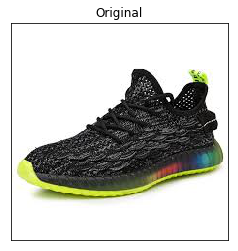

In [2]:
img = Image.open('images/test.jfif')
img = np.array(img)
plt.subplot(111),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()

## Flipping
Flipping images is one of the most popular methods of image data augmentation. This is primarily due to the simplicity of the flipping code and how intuitive it is for most problems that flipped images would add value to the model. The model below could be thought of as seeing a left shoe rather than a right shoe, thus with this data augmentation, the model becomes more robust to the potential variations with seeing shoes.

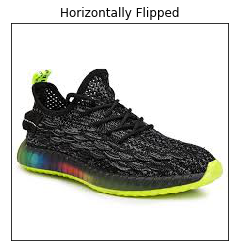

In [3]:
# Flipping images with Numpy
img = Image.open('images/test.jfif')
img = np.array(img)
flipped_img = np.fliplr(img) # Horizontal Flipping
plt.subplot(111),plt.imshow(flipped_img),plt.title('Horizontally Flipped')
plt.xticks([]), plt.yticks([])
plt.show()

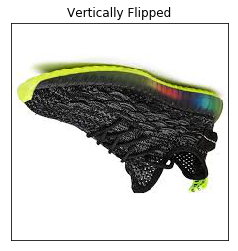

In [4]:
# Flipping images with Numpy
img = Image.open('images/test.jfif')
img = np.array(img)
flipped_img = np.flipud(img) # Vertically Flipped
plt.subplot(111),plt.imshow(flipped_img),plt.title('Vertically Flipped')
plt.xticks([]), plt.yticks([])
plt.show()

## Translations
It is easy to imagine the value of translational augmentation with classifiers whose purpose is detection. As if this classification model was trying to detect when the shoe is in the image vs. when it is not. These translations will help it pick up on the shoe without seeing the entire shoe in the frame.

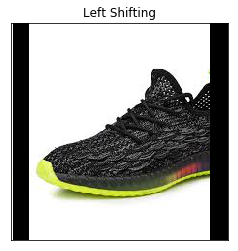

In [5]:
# Shifting Left
# Dimensions of Image 
HEIGHT=225
WIDTH=225
img = Image.open('images/test.jfif')
img = np.array(img)
for i in range(HEIGHT, 1, -1):
    for j in range(WIDTH):
        if (i < HEIGHT-20):
            img[j][i] = img[j][i-20]
        elif (i < HEIGHT-1):
            img[j][i] = 0
plt.subplot(111),plt.imshow(img),plt.title('Left Shifting')
plt.xticks([]), plt.yticks([])
plt.show()

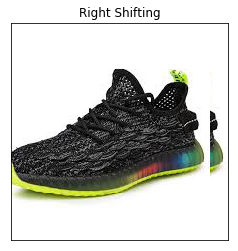

In [6]:
# Shifting Right
img = Image.open('images/test.jfif')
img = np.array(img)
for j in range(WIDTH):
    for i in range(HEIGHT):
        if (i < HEIGHT-20):
            img[j][i] = img[j][i+20]
plt.subplot(111),plt.imshow(img),plt.title('Right Shifting')
plt.xticks([]), plt.yticks([])
plt.show()

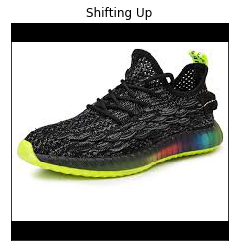

In [7]:
# Shifting Up
img = Image.open('images/test.jfif')
img = np.array(img)
for j in range(WIDTH):
    for i in range(HEIGHT):
        if (j < WIDTH - 20 and j > 20):
            img[j][i] = img[j+20][i]
        else:
            img[j][i] = 0
plt.subplot(111),plt.imshow(img),plt.title('Shifting Up')
plt.xticks([]), plt.yticks([])
plt.show()

## Blurring
Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied.<br>
Some Common types of noise used in augmentation are:
- Averaging
- Gaussian Filtering
- Median Filtering
- Bilateral Filtering

### Averaging

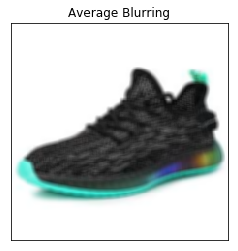

In [8]:
img = cv2.imread('images/test.jfif')
blur = cv2.blur(img,(5,5))
plt.subplot(111),plt.imshow(blur),plt.title('Average Blurring')
plt.xticks([]), plt.yticks([])
plt.show()

### Gaussian Blur

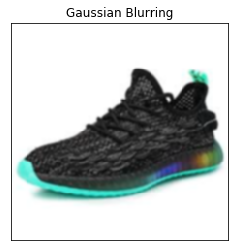

In [9]:
img = cv2.imread('images/test.jfif')
gblur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(111),plt.imshow(gblur),plt.title('Gaussian Blurring')
plt.xticks([]), plt.yticks([])
plt.show()

### Median Blur

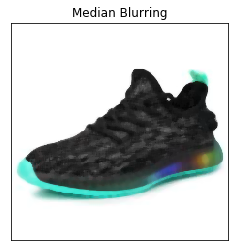

In [10]:
img = cv2.imread('images/test.jfif')
mblur = cv2.medianBlur(img,5)
plt.subplot(111),plt.imshow(mblur),plt.title('Median Blurring')
plt.xticks([]), plt.yticks([])
plt.show()

### Bilateral Blur

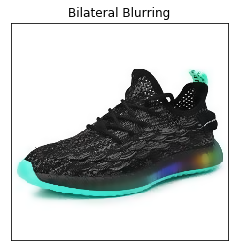

In [11]:
img = cv2.imread('images/test.jfif')
biblur = cv2.bilateralFilter(img,9,75,75)
plt.subplot(111),plt.imshow(biblur),plt.title('Bilateral Blurring')
plt.xticks([]), plt.yticks([])
plt.show()

## Noise
Each time a training sample is exposed to the model, random noise is added to the input variables making them different every time it is exposed to the model.Adding noise may help with lighting distortions and make the model more robust in general.
The two main types of noises used are:
- Gaussian Noise
- Salt and Pepper/Speckle Noise

### Gaussian Noise

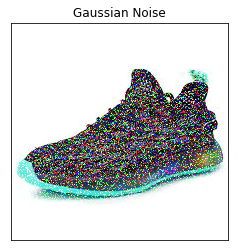

In [12]:
img = cv2.imread('images/test.jfif')
# Generate Gaussian noise
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img,gauss)
# Display the image
plt.subplot(111),plt.imshow(img_gauss),plt.title('Gaussian Noise')
plt.xticks([]), plt.yticks([])
plt.show()

### Salt And Pepper Noise

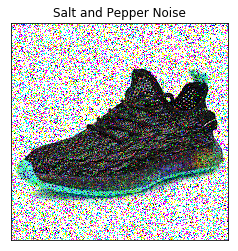

In [13]:
img = cv2.imread('images/test.jfif')
gauss = np.random.normal(0,1,img.size)
gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
noise = img + img * gauss
plt.subplot(111),plt.imshow(noise),plt.title('Salt and Pepper Noise')
plt.xticks([]), plt.yticks([])
plt.show()